# MACHINE LEARNING LAB PROJECT
## -----------------------------------------------
## DEVELOPED BY: Zayyan
## -----------------------------------------------

# Import Librarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,roc_auc_score)

# Proccess Data - EDA
## Encodding Features

In [2]:
data = pd.read_csv('Heart Disease.csv')
data.head()
print("dataset info:")
data.info()
print("\nsummary statistics:")
print(data.describe())

dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome (Target)          1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gender                    1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  

## Visualizing

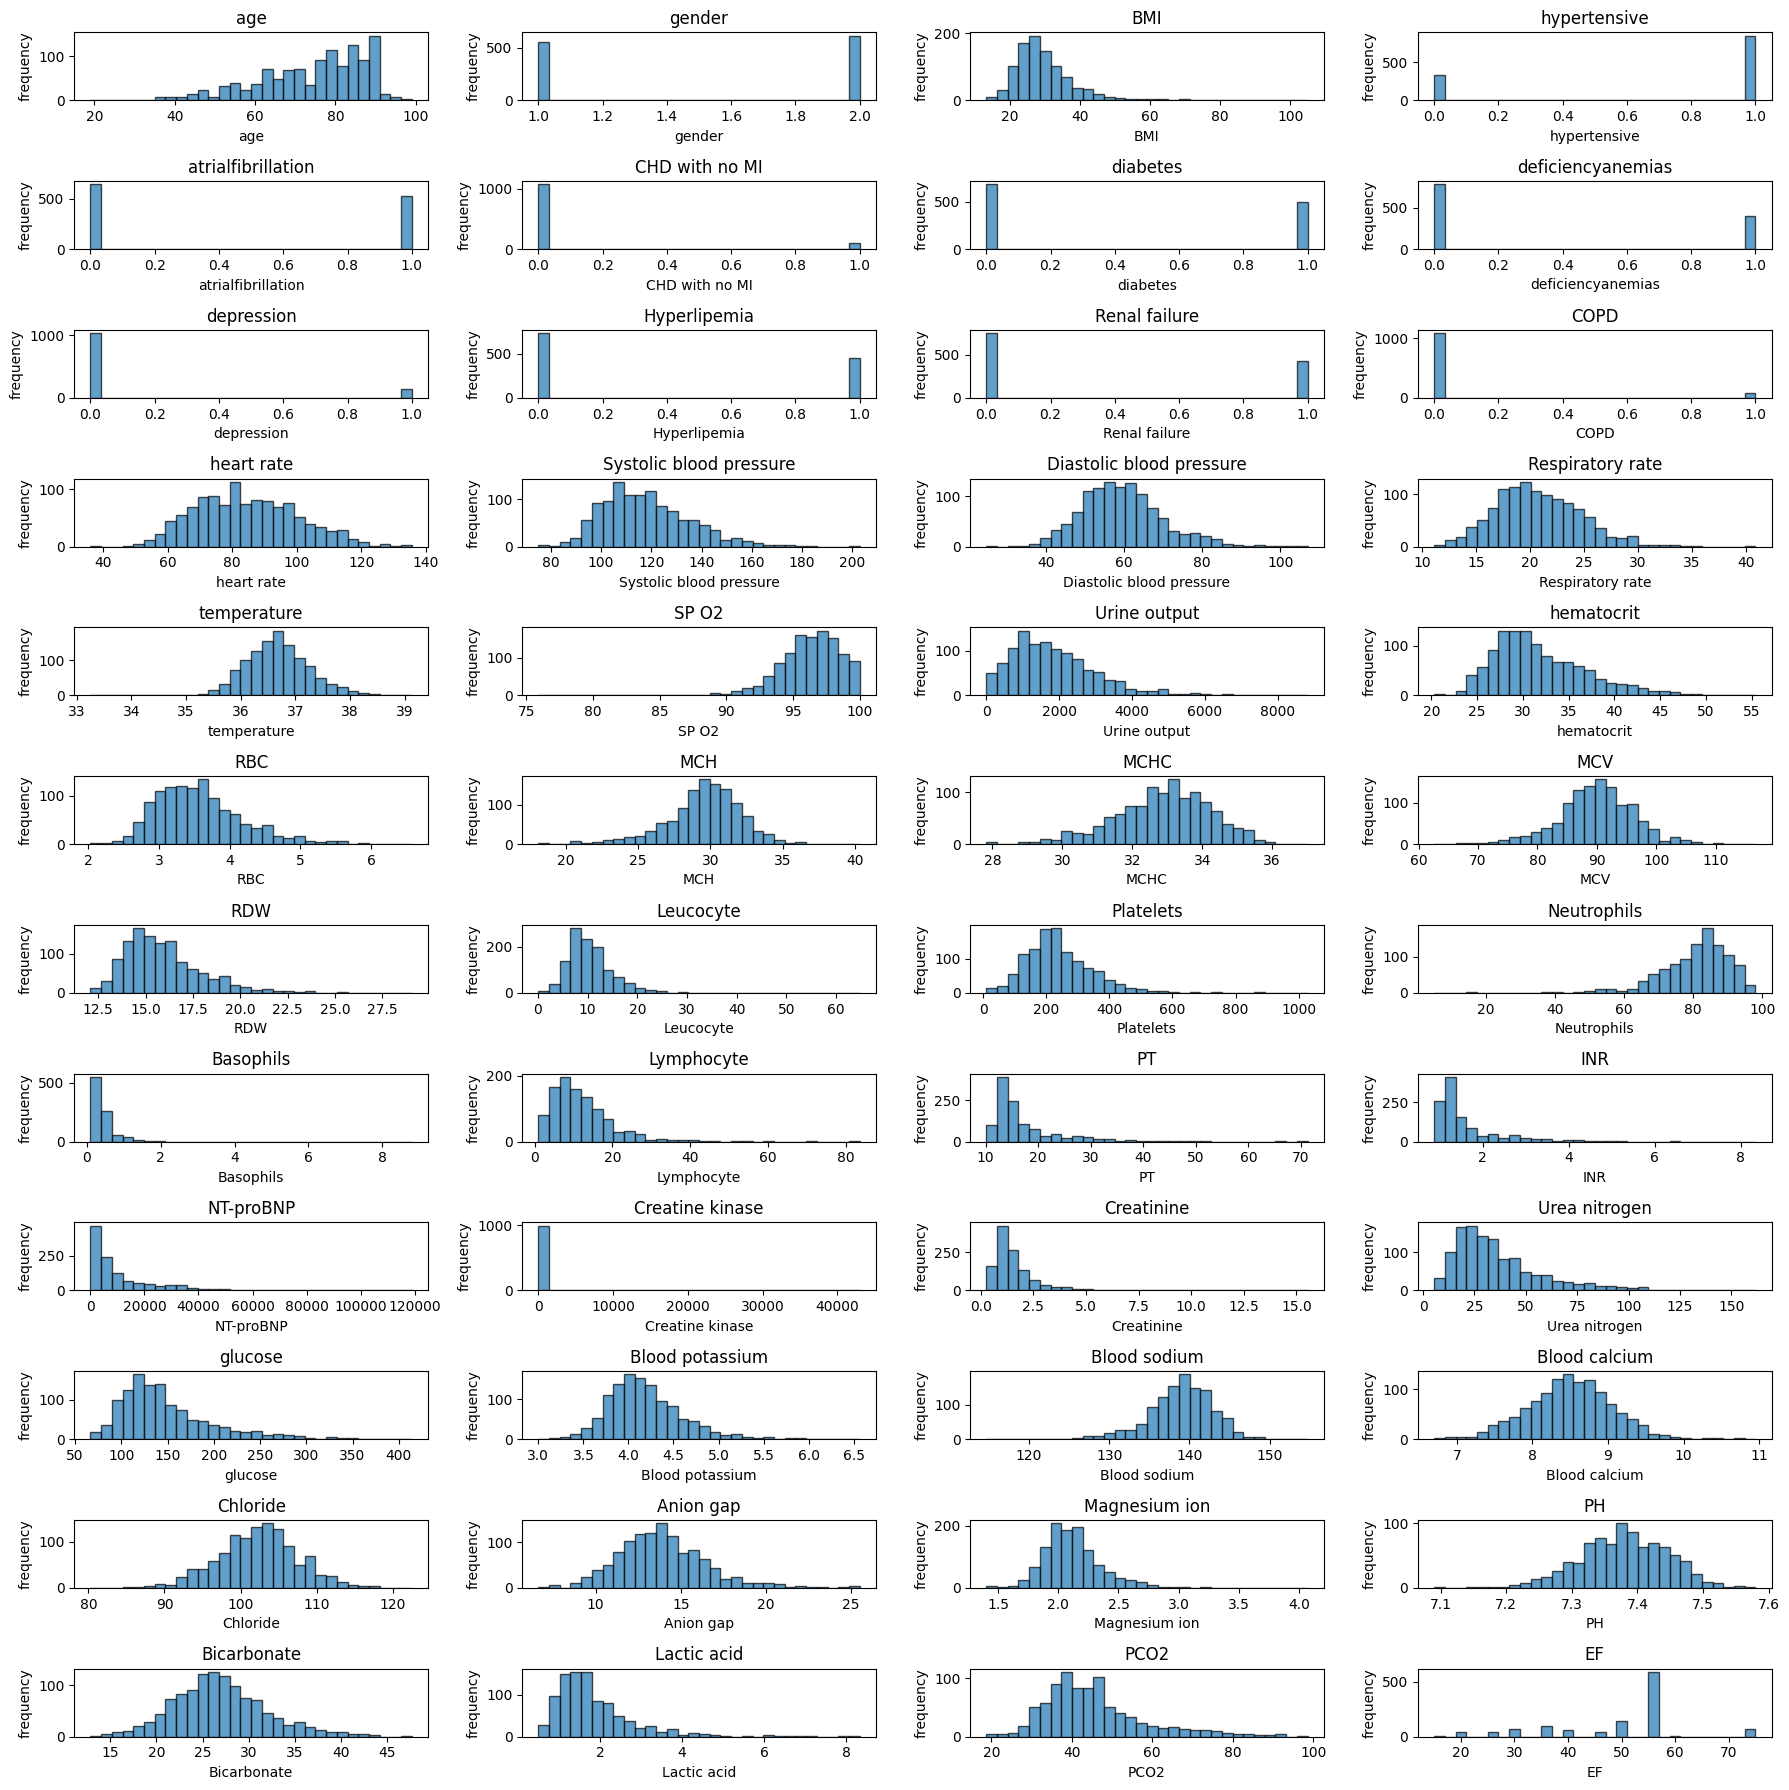

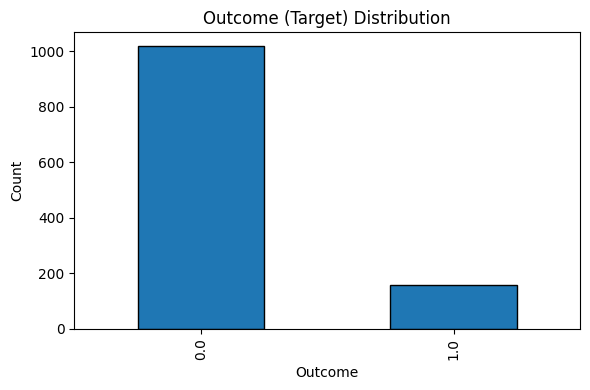

In [3]:
features = data.columns.drop(['outcome (Target)', 'group', 'ID'])
target = 'outcome (Target)'
X = data[features]
y = data[target]
plt.figure(figsize=(18, 18))
num_features = len(features)
rows = int(np.ceil(num_features / 4))
for i, feature in enumerate(features):
    plt.subplot(rows, 4, i + 1)
    data[feature].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 4))
data['outcome (Target)'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Outcome (Target) Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Compute Correlation

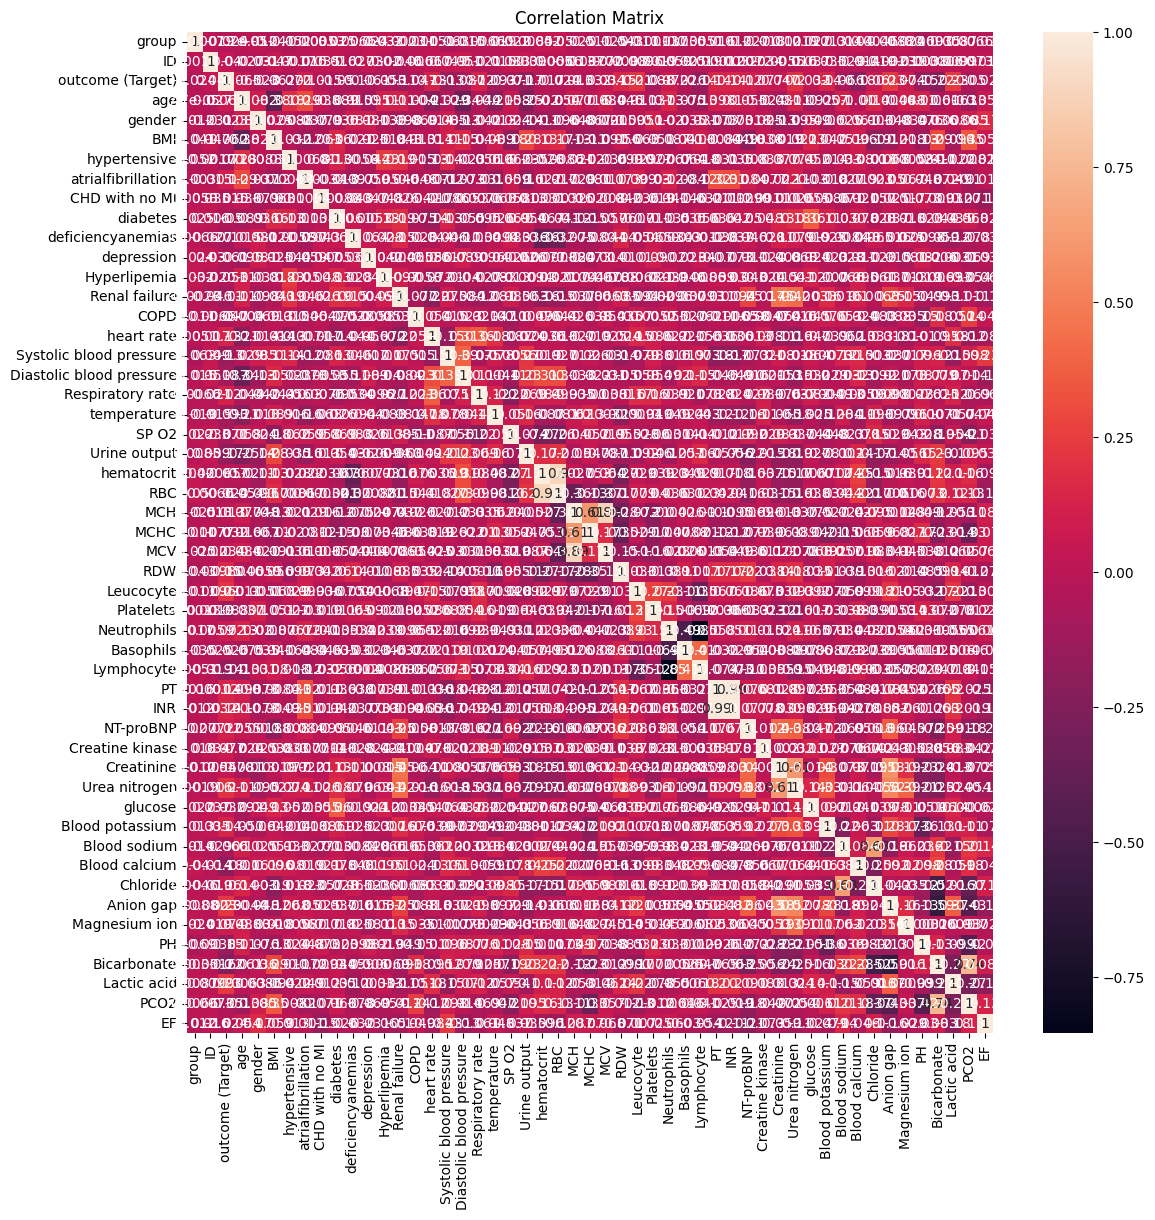

Correlation with outcome (Target):
outcome (Target)            1.000000
Lactic acid                 0.229695
Anion gap                   0.229676
Leucocyte                   0.208274
Urea nitrogen               0.203024
RDW                         0.148089
INR                         0.144444
PT                          0.140299
Blood potassium             0.136940
heart rate                  0.129750
NT-proBNP                   0.121075
Respiratory rate            0.117015
atrialfibrillation          0.100975
Creatine kinase             0.076656
Magnesium ion               0.074033
Neutrophils                 0.072177
age                         0.064510
Chloride                    0.059834
Creatinine                  0.046717
ID                          0.040398
MCV                         0.034144
glucose                     0.032436
MCH                         0.013387
CHD with no MI             -0.014694
hematocrit                 -0.016533
gender                     -0.022690
RBC

In [4]:
matrix = data.corr()
plt.figure(figsize=(13, 13))
sns.heatmap(matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()
corr = matrix[target].sort_values(ascending=False)
print(f"Correlation with {target}:")
print(corr)
print("\n")

# Define the features & Target Variable(s)

In [5]:
correlations = matrix[target]
highCorr = correlations[correlations > 0.129].index
highCorr = [f for f in highCorr if f not in ['outcome (Target)', 'group', 'ID']]
X = data[highCorr]
y = data['outcome (Target)']

print("Selected Features with correlation > 0.125:")
print(X.columns.tolist())
print(f"Number of selected features: {len(X.columns)}")
print("\nTarget:")
print(y.name)
resultLog = {}
resultNaive = {}
resultDes = {}
resultRandom = {}
resultknn = {}
resultsvm = {}

pd.set_option('display.max_colwidth', None)

Selected Features with correlation > 0.125:
['heart rate', 'RDW', 'Leucocyte', 'PT', 'INR', 'Urea nitrogen', 'Blood potassium', 'Anion gap', 'Lactic acid']
Number of selected features: 9

Target:
outcome (Target)


# Train Model Using Logistic Regression

In [6]:
hyperpara = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [100, 300, 500]}

selectFeat = X.columns.tolist()
dataset = data.dropna()

x = dataset[selectFeat]
y = dataset[target]

imputer = SimpleImputer(strategy='mean')
xImpute = imputer.fit_transform(x)

scaler = StandardScaler()
xScaled = scaler.fit_transform(xImpute)

xtrain, xvt, ytrain, yvt = train_test_split(xScaled, y, test_size=0.4, random_state=42)
xval, xtest, yval, ytest = train_test_split(xvt, yvt, test_size=0.5, random_state=42)

logReg = LogisticRegression()
grid = GridSearchCV(estimator=logReg, param_grid=hyperpara, cv=5, scoring='accuracy', verbose=1)
grid.fit(xtrain, ytrain)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.4f}")

best = grid.best_estimator_
ytrainp = best.predict(xtrain)
yvalp = best.predict(xval)
ytestp = best.predict(xtest)

trainacc = accuracy_score(ytrain, ytrainp)
valacc = accuracy_score(yval, yvalp)
testacc = accuracy_score(ytest, ytestp)

ytrainprob = best.predict_proba(xtrain)[:, 1]
yvalprob = best.predict_proba(xval)[:, 1]
ytestprob = best.predict_proba(xtest)[:, 1]

trainauc = roc_auc_score(ytrain, ytrainprob)
valauc = roc_auc_score(yval, yvalprob)
testauc = roc_auc_score(ytest, ytestprob)

resultLog['Logistic_Regression'] = {
    'best parameters': grid.best_params_,
    'train accuracy': trainacc,
    'validation accuracy': valacc,
    'test accuracy': testacc,
    'train auc': trainauc,
    'validation auc': valauc,
    'test auc': testauc
}

result = pd.DataFrame(resultLog).T
print("\nLogistic Regression Results:")
print(result)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Best CV score: 0.8478

Logistic Regression Results:
                                                    best parameters  \
Logistic_Regression  {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}   

                    train accuracy validation accuracy test accuracy  \
Logistic_Regression       0.855469            0.895349      0.860465   

                    train auc validation auc test auc  
Logistic_Regression  0.801736       0.801316   0.8451  


# Train Model Using Naive Bayes Classifier

In [7]:
selectFeat = X.columns.tolist()
dataset = data.dropna()

x = dataset[selectFeat]
y = dataset[target]

imputer = SimpleImputer(strategy='mean')
xImpute = imputer.fit_transform(x)

scaler = StandardScaler()
xScaled = scaler.fit_transform(xImpute)

xtrain, xvt, ytrain, yvt = train_test_split(xScaled, y, test_size=0.4, random_state=42)
xval, xtest, yval, ytest = train_test_split(xvt, yvt, test_size=0.5, random_state=42)


naiveBayes = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid = GridSearchCV(estimator=naiveBayes, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(xtrain, ytrain)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.4f}")

best = grid.best_estimator_
ytrainp = best.predict(xtrain)
yvalp = best.predict(xval)
ytestp = best.predict(xtest)

trainacc = accuracy_score(ytrain, ytrainp)
valacc = accuracy_score(yval, yvalp)
testacc = accuracy_score(ytest, ytestp)

ytrainprob = best.predict_proba(xtrain)[:, 1]
yvalprob = best.predict_proba(xval)[:, 1]
ytestprob = best.predict_proba(xtest)[:, 1]

trainauc = roc_auc_score(ytrain, ytrainprob)
valauc = roc_auc_score(yval, yvalprob)
testauc = roc_auc_score(ytest, ytestprob)

resultNaive['Naive_Bayes'] = {
    'best parameters': grid.best_params_,
    'train accuracy': trainacc,
    'validation accuracy': valacc,
    'test accuracy': testacc,
    'train auc': trainauc,
    'validation auc': valauc,
    'test auc': testauc
}

result = pd.DataFrame(resultNaive).T
print("\nNaive Bayes Results:")
print(result)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'var_smoothing': 1e-09}
Best CV score: 0.8050

Naive Bayes Results:
                      best parameters train accuracy validation accuracy  \
Naive_Bayes  {'var_smoothing': 1e-09}       0.820312            0.860465   

            test accuracy train auc validation auc  test auc  
Naive_Bayes      0.837209  0.748665       0.828947  0.791359  


# Train Model Using Descion Trees

In [8]:
hyperpara = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5], 
    'criterion': ['gini', 'entropy']
}

selectFeat = X.columns.tolist()
dataset = data.dropna()

x = dataset[selectFeat]
y = dataset[target]

imputer = SimpleImputer(strategy='mean')
xImpute = imputer.fit_transform(x)

scaler = StandardScaler()
xScaled = scaler.fit_transform(xImpute)
xtrain, xvt, ytrain, yvt = train_test_split(xScaled, y, test_size=0.4, random_state=42)
xval, xtest, yval, ytest = train_test_split(xvt, yvt, test_size=0.5, random_state=42)


dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(estimator=dt, param_grid=hyperpara, cv=5, scoring='accuracy', verbose=1)
grid.fit(xtrain, ytrain)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.4f}")

best = grid.best_estimator_
ytrainp = best.predict(xtrain)
yvalp = best.predict(xval)
ytestp = best.predict(xtest)

trainacc = accuracy_score(ytrain, ytrainp)
valacc = accuracy_score(yval, yvalp)
testacc = accuracy_score(ytest, ytestp)

ytrainprob = best.predict_proba(xtrain)[:, 1]
yvalprob = best.predict_proba(xval)[:, 1]
ytestprob = best.predict_proba(xtest)[:, 1]

trainauc = roc_auc_score(ytrain, ytrainprob)
valauc = roc_auc_score(yval, yvalprob)
testauc = roc_auc_score(ytest, ytestprob)

resultDes['Decision_Tree'] = {
    'best parameters': grid.best_params_, 
    'train accuracy': trainacc, 
    'validation accuracy': valacc, 
    'test accuracy': testacc, 
    'train auc': trainauc, 
    'validation auc': valauc, 
    'test auc': testauc
}

result = pd.DataFrame(resultDes).T
print("\nDecision Tree Results:")
print(result)

print(f"\nTop Feature Importances:")
feature_importance = pd.DataFrame({
    'feature': selectFeat,
    'importance': best.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head(10))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.8479

Decision Tree Results:
                                                                                       best parameters  \
Decision_Tree  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}   

              train accuracy validation accuracy test accuracy train auc  \
Decision_Tree       0.925781            0.860465       0.77907  0.942646   

              validation auc  test auc  
Decision_Tree       0.617763  0.423604  

Top Feature Importances:
           feature  importance
7        Anion gap    0.223211
3               PT    0.201105
4              INR    0.176369
1              RDW    0.103528
8      Lactic acid    0.097397
0       heart rate    0.085023
5    Urea nitrogen    0.067147
2        Leucocyte    0.046221
6  Blood potassium    0.000000


# Train Model Using Random Forest

In [9]:
selectFeat = X.columns.tolist()
dataset = data.dropna()

x = dataset[selectFeat]
y = dataset[target]

imputer = SimpleImputer(strategy='mean')
xImpute = imputer.fit_transform(x)

scaler = StandardScaler()
xScaled = scaler.fit_transform(xImpute)


xtrain, xvt, ytrain, yvt = train_test_split(xScaled, y, test_size=0.4, random_state=42)
xval, xtest, yval, ytest = train_test_split(xvt, yvt, test_size=0.5, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 10, None], 
    'criterion': ['gini', 'entropy'], 
    'bootstrap': [True, False],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid.fit(xtrain, ytrain)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.4f}")

best = grid.best_estimator_
ytrainp = best.predict(xtrain)
yvalp = best.predict(xval)
ytestp = best.predict(xtest)

trainacc = accuracy_score(ytrain, ytrainp)
valacc = accuracy_score(yval, yvalp)
testacc = accuracy_score(ytest, ytestp)

ytrainprob = best.predict_proba(xtrain)[:, 1]
yvalprob = best.predict_proba(xval)[:, 1]
ytestprob = best.predict_proba(xtest)[:, 1]

trainauc = roc_auc_score(ytrain, ytrainprob)
valauc = roc_auc_score(yval, yvalprob)
testauc = roc_auc_score(ytest, ytestprob)

resultRandom['Random_Forest'] = {
    'best parameters': grid.best_params_,
    'train accuracy': trainacc,
    'validation accuracy': valacc,
    'test accuracy': testacc,
    'train auc': trainauc,
    'validation auc': valauc,
    'test auc': testauc
}

result = pd.DataFrame(resultRandom).T
print("\nRandom Forest Results:")
print(result)

print(f"\nTop Feature Importances:")
feature_importance = pd.DataFrame({
    'feature': selectFeat,
    'importance': best.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head(10))

print(f"\nBest Model Details:")
print(f"Number of trees: {best.n_estimators}")
print(f"Max depth: {best.max_depth}")
print(f"Criterion: {best.criterion}")
print(f"Bootstrap: {best.bootstrap}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best CV score: 0.8557

Random Forest Results:
                                                                                                                           best parameters  \
Random_Forest  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}   

              train accuracy validation accuracy test accuracy train auc  \
Random_Forest       0.933594            0.872093      0.802326   0.98053   

              validation auc  test auc  
Random_Forest       0.788158  0.808219  

Top Feature Importances:
           feature  importance
7        Anion gap    0.244503
5    Urea nitrogen    0.116213
2        Leucocyte    0.112447
4              INR    0.111547
3               PT    0.096585
0       heart rate

# Train Model Using K-Nearest Neighbour

In [13]:
hyperpara = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

selectFeat = X.columns.tolist()
dataset = data.dropna()

x = dataset[selectFeat]
y = dataset[target]

imputer = SimpleImputer(strategy='mean')
xImpute = imputer.fit_transform(x)

scaler = StandardScaler()
xScaled = scaler.fit_transform(xImpute)

xtrain, xvt, ytrain, yvt = train_test_split(xScaled, y, test_size=0.4, random_state=42)
xval, xtest, yval, ytest = train_test_split(xvt, yvt, test_size=0.5, random_state=42)

knn = KNeighborsClassifier()
grid = GridSearchCV(
    estimator=knn, 
    param_grid=hyperpara, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1
)

grid.fit(xtrain, ytrain)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.4f}")

best = grid.best_estimator_
ytrainp = best.predict(xtrain)
yvalp = best.predict(xval)
ytestp = best.predict(xtest)

trainacc = accuracy_score(ytrain, ytrainp)
valacc = accuracy_score(yval, yvalp)
testacc = accuracy_score(ytest, ytestp)

ytrainprob = best.predict_proba(xtrain)[:, 1]
yvalprob = best.predict_proba(xval)[:, 1]
ytestprob = best.predict_proba(xtest)[:, 1]

trainauc = roc_auc_score(ytrain, ytrainprob)
valauc = roc_auc_score(yval, yvalprob)
testauc = roc_auc_score(ytest, ytestprob)

resultknn['KNN'] = {
    'best parameters': grid.best_params_, 
    'train accuracy': trainacc, 
    'validation accuracy': valacc, 
    'test accuracy': testacc, 
    'train auc': trainauc, 
    'validation auc': valauc, 
    'test auc': testauc
}

result = pd.DataFrame(resultknn).T
print("\nK-Nearest Neighbors Results:")
print(result)

print(f"\nBest Model Details:")
print(f"Number of neighbors: {best.n_neighbors}")
print(f"Distance metric: {best.metric}")



Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best CV score: 0.8439

K-Nearest Neighbors Results:
                                                             best parameters  \
KNN  {'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}   

    train accuracy validation accuracy test accuracy train auc validation auc  \
KNN          0.875            0.883721      0.825581  0.859034       0.740789   

     test auc  
KNN  0.646997  

Best Model Details:
Number of neighbors: 9
Distance metric: euclidean


# Train Model Using SVM

In [11]:
selectFeat = X.columns.tolist()
dataset = data.dropna()

x = dataset[selectFeat]
y = dataset[target]

imputer = SimpleImputer(strategy='mean')
xImpute = imputer.fit_transform(x)

scaler = MinMaxScaler()
xScaled = scaler.fit_transform(xImpute)

xtrain, x_temp, ytrain, y_temp = train_test_split(xScaled, y, test_size=0.4, random_state=42)
xval, xtest, yval, ytest = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svm = SVC(probability=True, random_state=42)
grid = GridSearchCV(
    estimator=svm, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1
)

print("Starting Grid Search for SVM (this may take a while)...")
grid.fit(xtrain, ytrain)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.4f}")

best = grid.best_estimator_
ytrainp = best.predict(xtrain)
yvalp = best.predict(xval)
ytestp = best.predict(xtest)

trainacc = accuracy_score(ytrain, ytrainp)
valacc = accuracy_score(yval, yvalp)
testacc = accuracy_score(ytest, ytestp)

ytrainprob = best.predict_proba(xtrain)[:, 1]
yvalprob = best.predict_proba(xval)[:, 1]
ytestprob = best.predict_proba(xtest)[:, 1]

trainauc = roc_auc_score(ytrain, ytrainprob)
valauc = roc_auc_score(yval, yvalprob)
testauc = roc_auc_score(ytest, ytestprob)

resultsvm['SVM'] = {
    'best parameters': grid.best_params_, 
    'train accuracy': trainacc, 
    'validation accuracy': valacc, 
    'test accuracy': testacc, 
    'train auc': trainauc, 
    'validation auc': valauc, 
    'test auc': testauc
}

result = pd.DataFrame(resultsvm).T
print("\nSupport Vector Machine Results:")
print(result)

print(f"\nBest SVM Model Details:")
print(f"Kernel: {best.kernel}")
print(f"C (Regularization): {best.C}")
print(f"Gamma: {best.gamma}")
if hasattr(best, 'degree') and best.kernel == 'poly':
    print(f"Polynomial degree: {best.degree}")


print(f"Number of support vectors: {best.n_support_}")
print(f"Total support vectors: {sum(best.n_support_)}")
print(f"Support vector ratio: {sum(best.n_support_) / len(xtrain):.3f}")


Starting Grid Search for SVM (this may take a while)...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best CV score: 0.8517

Support Vector Machine Results:
                                    best parameters train accuracy  \
SVM  {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}       0.878906   

    validation accuracy test accuracy train auc validation auc  test auc  
SVM            0.906977      0.848837  0.844459       0.819737  0.812434  

Best SVM Model Details:
Kernel: poly
C (Regularization): 0.1
Gamma: scale
Polynomial degree: 3
Number of support vectors: [46 40]
Total support vectors: 86
Support vector ratio: 0.336


# Comparison

Available models and their results:
✓ Logistic Regression: Results available
✓ Naive Bayes: Results available
✓ Decision Tree: Results available
✓ Random Forest: Results available
✓ KNN: Results available
✓ SVM: Results available

Results Summary:
                 model  train_acc   val_acc  test_acc  train_auc   val_auc  \
0  Logistic Regression   0.855469  0.895349  0.860465   0.801736  0.801316   
1          Naive Bayes   0.820312  0.860465  0.837209   0.748665  0.828947   
2        Decision Tree   0.925781  0.860465  0.779070   0.942646  0.617763   
3        Random Forest   0.933594  0.872093  0.802326   0.980530  0.788158   
4                  KNN   0.875000  0.883721  0.825581   0.859034  0.740789   
5                  SVM   0.878906  0.906977  0.848837   0.844459  0.819737   

   test_auc  
0  0.845100  
1  0.791359  
2  0.423604  
3  0.808219  
4  0.646997  
5  0.812434  


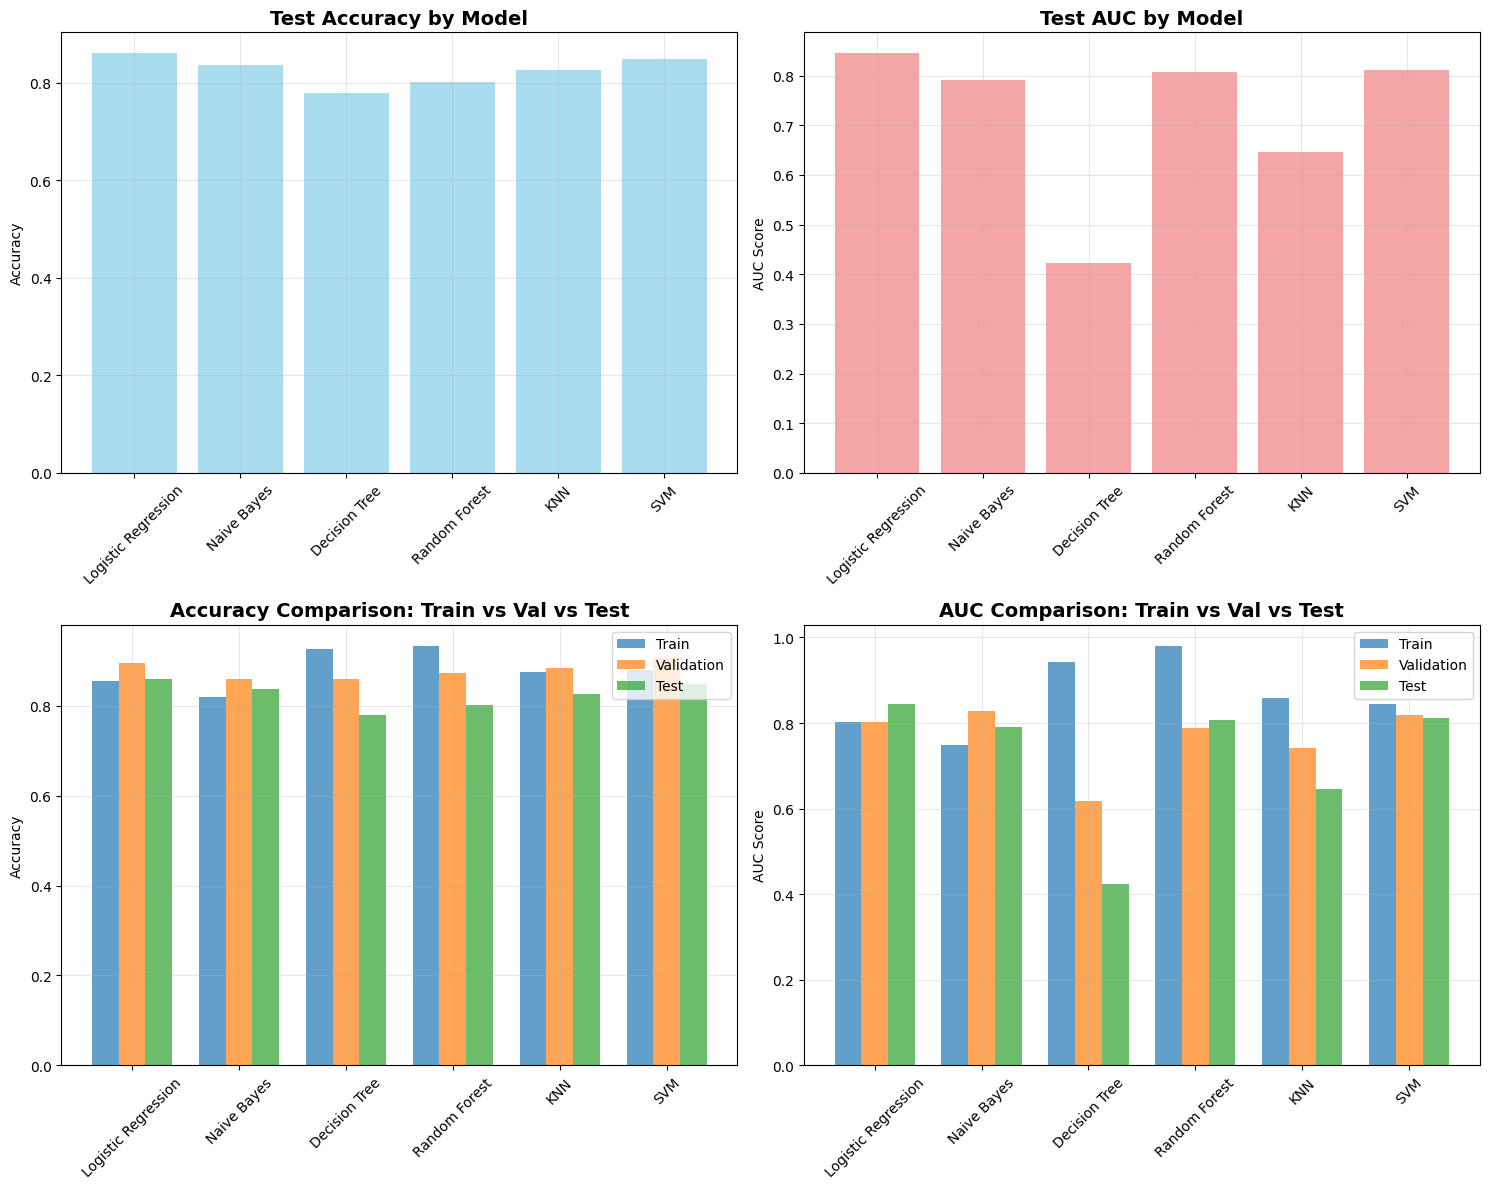


BEST MODEL ANALYSIS

BEST MODEL BY TEST ACCURACY:
Model: Logistic Regression
Test Accuracy: 86.05%
Test AUC: 84.51%
Validation Accuracy: 89.53%

BEST MODEL BY TEST AUC:
Model: Logistic Regression
Test AUC: 84.51%
Test Accuracy: 86.05%
Validation AUC: 80.13%

DETAILED RESULTS TABLE:
----------------------------------------------------------------------------------------------------
              model train_acc val_acc test_acc train_auc val_auc test_auc
Logistic Regression    85.55%  89.53%   86.05%    80.17%  80.13%   84.51%
        Naive Bayes    82.03%  86.05%   83.72%    74.87%  82.89%   79.14%
      Decision Tree    92.58%  86.05%   77.91%    94.26%  61.78%   42.36%
      Random Forest    93.36%  87.21%   80.23%    98.05%  78.82%   80.82%
                KNN    87.50%  88.37%   82.56%    85.90%  74.08%   64.70%
                SVM    87.89%  90.70%   84.88%    84.45%  81.97%   81.24%

OVERFITTING ANALYSIS:
------------------------------------------
Logistic Regression:
  Accuracy

In [12]:
results = {
    'Logistic Regression': resultLog, 
    'Naive Bayes': resultNaive, 
    'Decision Tree': resultDes, 
    'Random Forest': resultRandom, 
    'KNN': resultknn, 
    'SVM': resultsvm
}

target_name = 'outcome (Target)'
model_names = list(results.keys())

print("Available models and their results:")
for model_name in model_names:
    if model_name in results and results[model_name]:
        print(f"✓ {model_name}: Results available")
    else:
        print(f"✗ {model_name}: No results found")

model_results = []
for model_name in model_names:
    if model_name in results and results[model_name]:
        result_key = list(results[model_name].keys())[0]
        model_results.append({
            'model': model_name,
            'train_acc': results[model_name][result_key]['train accuracy'],
            'val_acc': results[model_name][result_key]['validation accuracy'],
            'test_acc': results[model_name][result_key]['test accuracy'],
            'train_auc': results[model_name][result_key]['train auc'],
            'val_auc': results[model_name][result_key]['validation auc'],
            'test_auc': results[model_name][result_key]['test auc']
        })

df_results = pd.DataFrame(model_results)
print(f"\nResults Summary:")
print(df_results)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].bar(df_results['model'], df_results['test_acc'], color='skyblue', alpha=0.7)
axes[0, 0].set_title('Test Accuracy by Model', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(df_results['model'], df_results['test_auc'], color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Test AUC by Model', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('AUC Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

x_pos = np.arange(len(df_results))
width = 0.25

axes[1, 0].bar(x_pos - width, df_results['train_acc'], width, label='Train', alpha=0.7)
axes[1, 0].bar(x_pos, df_results['val_acc'], width, label='Validation', alpha=0.7)
axes[1, 0].bar(x_pos + width, df_results['test_acc'], width, label='Test', alpha=0.7)
axes[1, 0].set_title('Accuracy Comparison: Train vs Val vs Test', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(df_results['model'], rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(x_pos - width, df_results['train_auc'], width, label='Train', alpha=0.7)
axes[1, 1].bar(x_pos, df_results['val_auc'], width, label='Validation', alpha=0.7)
axes[1, 1].bar(x_pos + width, df_results['test_auc'], width, label='Test', alpha=0.7)
axes[1, 1].set_title('AUC Comparison: Train vs Val vs Test', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('AUC Score')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(df_results['model'], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

best_acc_model = df_results.loc[df_results['test_acc'].idxmax()]
best_auc_model = df_results.loc[df_results['test_auc'].idxmax()]

print("\n" + "===========================================")
print("BEST MODEL ANALYSIS")
print("=========================================")

print(f"\nBEST MODEL BY TEST ACCURACY:")
print(f"Model: {best_acc_model['model']}")
print(f"Test Accuracy: {best_acc_model['test_acc']*100:.2f}%")
print(f"Test AUC: {best_acc_model['test_auc']*100:.2f}%")
print(f"Validation Accuracy: {best_acc_model['val_acc']*100:.2f}%")

print(f"\nBEST MODEL BY TEST AUC:")
print(f"Model: {best_auc_model['model']}")
print(f"Test AUC: {best_auc_model['test_auc']*100:.2f}%")
print(f"Test Accuracy: {best_auc_model['test_acc']*100:.2f}%")
print(f"Validation AUC: {best_auc_model['val_auc']*100:.2f}%")

print(f"\nDETAILED RESULTS TABLE:")
print("-"*100)
results_table = df_results.copy()
for col in ['train_acc', 'val_acc', 'test_acc', 'train_auc', 'val_auc', 'test_auc']:
    results_table[col] = results_table[col].apply(lambda x: f"{x*100:.2f}%")

print(results_table.to_string(index=False))

print(f"\nOVERFITTING ANALYSIS:")
print("------------------------------------------")
df_results['acc_overfit'] = df_results['train_acc'] - df_results['test_acc']
df_results['auc_overfit'] = df_results['train_auc'] - df_results['test_auc']

for idx, row in df_results.iterrows():
    print(f"{row['model']}:")
    print(f"  Accuracy gap (Train-Test): {row['acc_overfit']*100:.2f}%")
    print(f"  AUC gap (Train-Test): {row['auc_overfit']*100:.2f}%")
    if row['acc_overfit'] > 0.1:
        print("Potential overfitting detected!")
    print()

print("=========================================")
